In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd

# 1. Preparación de tablas

In [3]:
centro = pd.read_excel(r"datasets\dengue\lima_centro_2024.xlsx",sheet_name="Sheet1")
este = pd.read_excel(r"datasets\dengue\lima_este_2024.xlsx",sheet_name="Sheet1")
norte = pd.read_excel(r"datasets\dengue\lima_norte_2024.xlsx",sheet_name="Sheet1")
sur = pd.read_excel(r"datasets\dengue\lima_sur_2024.xlsx",sheet_name="Sheet1")
callao = pd.read_excel(r"datasets\dengue\callao_2024.xlsx",sheet_name="Sheet1")
base2024 = pd.concat([centro,este,norte,sur,callao],axis=0,ignore_index=True)

In [4]:
# Agregación de columna suma
base2024['Casos'] = base2024['Sin signos de alarma_total'] + base2024['Con signos de alarma_total'] + base2024['Grave_total']
base2024['Año'] = 2024
base2024 = base2024[['Año','Provincia','Distrito','Semana','Casos']]

In [7]:
base2023 = pd.read_excel(r'datasets\dengue\lima_callao_2023.xlsx').iloc[:,1:]
base2023['Año'] = 2023
base2023 = base2023[['Año','semana','provincia','distrito','cantidad']]
base2023.columns = ['Año','Semana','Provincia','Distrito','Casos']
base2023

,Año,Semana,Provincia,Distrito,Casos
0,2023,7,CALLAO,CALLAO,1
1,2023,10,CALLAO,VENTANILLA,1
2,2023,11,CALLAO,VENTANILLA,2
3,2023,12,CALLAO,CALLAO,1
4,2023,12,CALLAO,VENTANILLA,9
...,...,...,...,...,...
1468,2023,52,LIMA,MIRAFLORES,1
1469,2023,52,LIMA,INDEPENDENCIA,1
1470,2023,52,LIMA,ATE,1
1471,2023,52,LIMA,SAN MARTIN DE PORRES,2


In [8]:
peru2000_2022 = pd.read_csv("datasets\dengue\peru2000_2022.csv",sep=',',on_bad_lines='warn')
to2022 = peru2000_2022.loc[((peru2000_2022['departamento']=='LIMA') | (peru2000_2022['departamento']=='CALLAO')) & ((peru2000_2022['ano'] <= 2022) & (peru2000_2022['ano'] >= 2020))]
to2022 = to2022[['ano','provincia','distrito','semana']]
to2022['casos'] = 1
to2022.set_index(['ano','provincia','distrito','semana'],inplace=True)

# Agruparlo al formato de trabajo
base2022 = to2022.groupby(level=[0,1,2,3])['casos'].sum().reset_index()
base2022.columns = ['Año','Provincia','Distrito','Semana','Casos']

base_dengue = pd.concat([base2022,base2023,base2024],axis=0,ignore_index=True)
base_dengue

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\PC\AppData\Local\Temp\ipykernel_30292\2775605448.py:1: SyntaxWarning: invalid escape sequence '\d'
  peru2000_2022 = pd.read_csv("datasets\dengue\peru2000_2022.csv",sep=',',on_bad_lines='warn')
C:\Users\PC\AppData\Local\Temp\ipykernel_30292\2775605448.py:1: ParserWarning: Skipping line 87871: expected 14 fields, saw 16
Skipping line 88799: expected 14 fields, saw 16
Skipping line 89573: expected 14 fields, saw 16

  peru2000_2022 = pd.read_csv("datasets\dengue\peru2000_2022.csv",sep=',',on_bad_lines='warn')
C:\Users\PC\AppData\Local\Temp\ipykernel_30292\2775605448.py:1: ParserWarning: Skipping line 176478: expected 14 fields, saw 16
Skipping line 177184: expected 14 fields, saw 16
Skipping line 177191: expected 14 fields, saw 16
Skipping line 183099: expected 14 fields, saw 16

  peru2000_2022 = pd.read_csv("datasets\dengue\peru2000_2022.csv",sep=',',on_bad_lines='warn')
C:\User

,Año,Provincia,Distrito,Semana,Casos
0,2020,CALLAO,VENTANILLA,8,2
1,2020,CALLAO,VENTANILLA,10,1
2,2020,CALLAO,VENTANILLA,14,1
3,2020,LIMA,ATE,10,1
4,2020,LIMA,ATE,15,1
...,...,...,...,...,...
3073,2024,CALLAO,MI PERU,19,32
3074,2024,CALLAO,MI PERU,20,13
3075,2024,CALLAO,MI PERU,21,4
3076,2024,CALLAO,MI PERU,22,6


In [7]:
clima = pd.read_csv('datasets/variables-climatológicas/metereologia.csv')
clima

,Fecha,Semana,Provincia,Distrito,Clima,Pluvio_Min,Pluvio_Max,Nubosidad,Presión,Viento_Min,Viento_Max,Temp_Min,Temp_Max,Punto_Rocío
0,2020-01-01,1,CALLAO,BELLAVISTA,Niebla,0.0,0.0,1.0,1012.0,4.0,13.0,19.0,22.0,19.0
1,2020-01-01,1,CALLAO,CALLAO,Niebla,0.0,0.0,1.0,1012.0,4.0,12.0,19.0,22.0,19.0
2,2020-01-01,1,CALLAO,CARMEN DE LA LEGUA REYNOSO,Niebla,0.0,0.0,0.7,1011.0,3.0,12.0,19.0,23.0,19.0
3,2020-01-01,1,CALLAO,LA PERLA,Niebla,0.0,0.0,1.0,1012.0,4.0,13.0,19.0,22.0,19.0
4,2020-01-01,1,CALLAO,LA PUNTA,Niebla,0.0,0.0,0.7,1012.0,5.0,13.0,19.0,22.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,2024-04-30,18,LIMA,SANTA ROSA,Despejado,0.0,0.0,0.3,1013.0,7.0,11.0,19.0,24.0,18.0
8246,2024-04-30,18,LIMA,SANTIAGO DE SURCO,Despejado,0.0,0.0,NaN,1011.0,6.0,15.0,19.0,24.0,17.0
8247,2024-04-30,18,LIMA,SURQUILLO,Despejado,0.0,0.0,NaN,1011.0,7.0,14.0,20.0,24.0,17.0
8248,2024-04-30,18,LIMA,VILLA EL SALVADOR,Despejado,0.0,0.0,0.3,1011.0,8.0,15.0,19.0,22.0,17.0


In [9]:
sql_dist = pd.merge(left=all_dists,right=detalle_distrito,how='left',left_on=['Provincia','Distrito'],right_on=['nombprov','nombdist'])
sql_dist = sql_dist[['ubigeo','Provincia','Distrito','Diris','poblacion','geo_point_2d','geometry']]
sql_dist.columns = ['Ubigeo','Provincia','Distrito','Diris','Población','Coordenadas','Polígono']
sql_dist.to_csv(r'datasets\sql_distritos.csv',index=False)

In [12]:
sql_dist

,Ubigeo,Provincia,Distrito,Diris,Población,Coordenadas,Polígono
0,150102,LIMA,ANCON,NORTE,69243.0,"{'lon': -77.0958901385, 'lat': -11.702568503}","POLYGON ((-77.06652 -11.57251, -77.06614 -11.5..."
1,150103,LIMA,ATE,ESTE,642828.0,"{'lon': -76.8773255404, 'lat': -12.0326633173}","POLYGON ((-76.83689 -11.99370, -76.83517 -11.9..."
2,150104,LIMA,BARRANCO,SUR,38748.0,"{'lon': -77.0208786599, 'lat': -12.1440729975}","POLYGON ((-77.01948 -12.13061, -77.01933 -12.1..."
3,070102,CALLAO,BELLAVISTA,CALLAO,87471.0,"{'lon': -77.1099461813, 'lat': -12.0599997107}","POLYGON ((-77.08767 -12.05191, -77.08768 -12.0..."
4,150105,LIMA,BREÑA,CENTRO,97431.0,"{'lon': -77.0506366491, 'lat': -12.0591441086}","POLYGON ((-77.05335 -12.04917, -77.05332 -12.0..."
5,070101,CALLAO,CALLAO,CALLAO,521346.0,"{'lon': -77.1216292343, 'lat': -12.0165350529}","POLYGON ((-77.12995 -11.93682, -77.12990 -11.9..."
6,150106,LIMA,CARABAYLLO,NORTE,360561.0,"{'lon': -76.9729546072, 'lat': -11.8074226462}","POLYGON ((-76.90215 -11.72887, -76.90130 -11.7..."
7,070103,CALLAO,CARMEN DE LA LEGUA REYNOSO,CALLAO,48492.0,"{'lon': -77.0904943627, 'lat': -12.0428211724}","POLYGON ((-77.08303 -12.03634, -77.08297 -12.0..."
8,150107,LIMA,CHACLACAYO,ESTE,46242.0,"{'lon': -76.7669698029, 'lat': -11.9916404851}","POLYGON ((-76.73089 -11.96185, -76.73065 -11.9..."
9,150108,LIMA,CHORRILLOS,SUR,356549.0,"{'lon': -77.0059862868, 'lat': -12.1926462918}","POLYGON ((-77.01927 -12.15387, -77.01926 -12.1..."


In [381]:
sql_dist = pd.read_csv(r'datasets\sql_distritos.csv')
clima = pd.read_csv('datasets/variables-climatológicas/metereologia.csv')

clima['Fecha'] = clima['Fecha'].astype('datetime64[ns]')
clima['Año'] = clima['Fecha'].dt.year


clima = pd.merge(left=clima,right=sql_dist,how='right',on=['Provincia','Distrito'])
clima = clima[['Año','Semana','Ubigeo'] + list(clima.columns)[4:-7]]
clima.drop_duplicates(subset=['Año','Ubigeo','Semana'],keep='last',inplace=True)

sql_clima = pd.merge(left=combox,right=clima,how='left',on=['Año','Semana','Ubigeo'])
sql_clima = sql_clima.loc[~((sql_clima['Año']==2024)&(sql_clima['Semana']>18)),:]
sql_clima

,Año,Semana,Ubigeo,Clima,Pluvio_Min,Pluvio_Max,Nubosidad,Presión,Viento_Min,Viento_Max,Temp_Min,Temp_Max,Punto_Rocío
0,2021,1,150102,Niebla,0.0,0.0,0.8,1012.0,3.0,11.0,20.000000,24.0,19.0
1,2021,1,150103,Niebla,0.0,0.0,0.6,1015.0,3.0,13.0,18.000000,24.0,18.0
2,2021,1,150104,Despejado,0.0,0.0,0.7,1012.0,9.0,11.0,19.333333,24.0,19.0
3,2021,1,70102,Despejado,0.0,0.0,0.9,1012.0,12.0,12.0,20.000000,22.0,19.0
4,2021,1,150105,Niebla,0.0,0.0,NaN,1013.0,9.0,12.0,20.000000,24.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,2024,18,150140,Despejado,0.0,0.0,NaN,1011.0,6.0,15.0,19.000000,24.0,17.0
8696,2024,18,150141,Despejado,0.0,0.0,NaN,1011.0,7.0,14.0,20.000000,24.0,17.0
8697,2024,18,70106,Despejado,0.0,0.0,0.3,1011.0,9.0,13.0,19.000000,22.0,18.0
8698,2024,18,150142,Despejado,0.0,0.0,0.3,1011.0,8.0,15.0,19.000000,22.0,17.0


<Axes: >

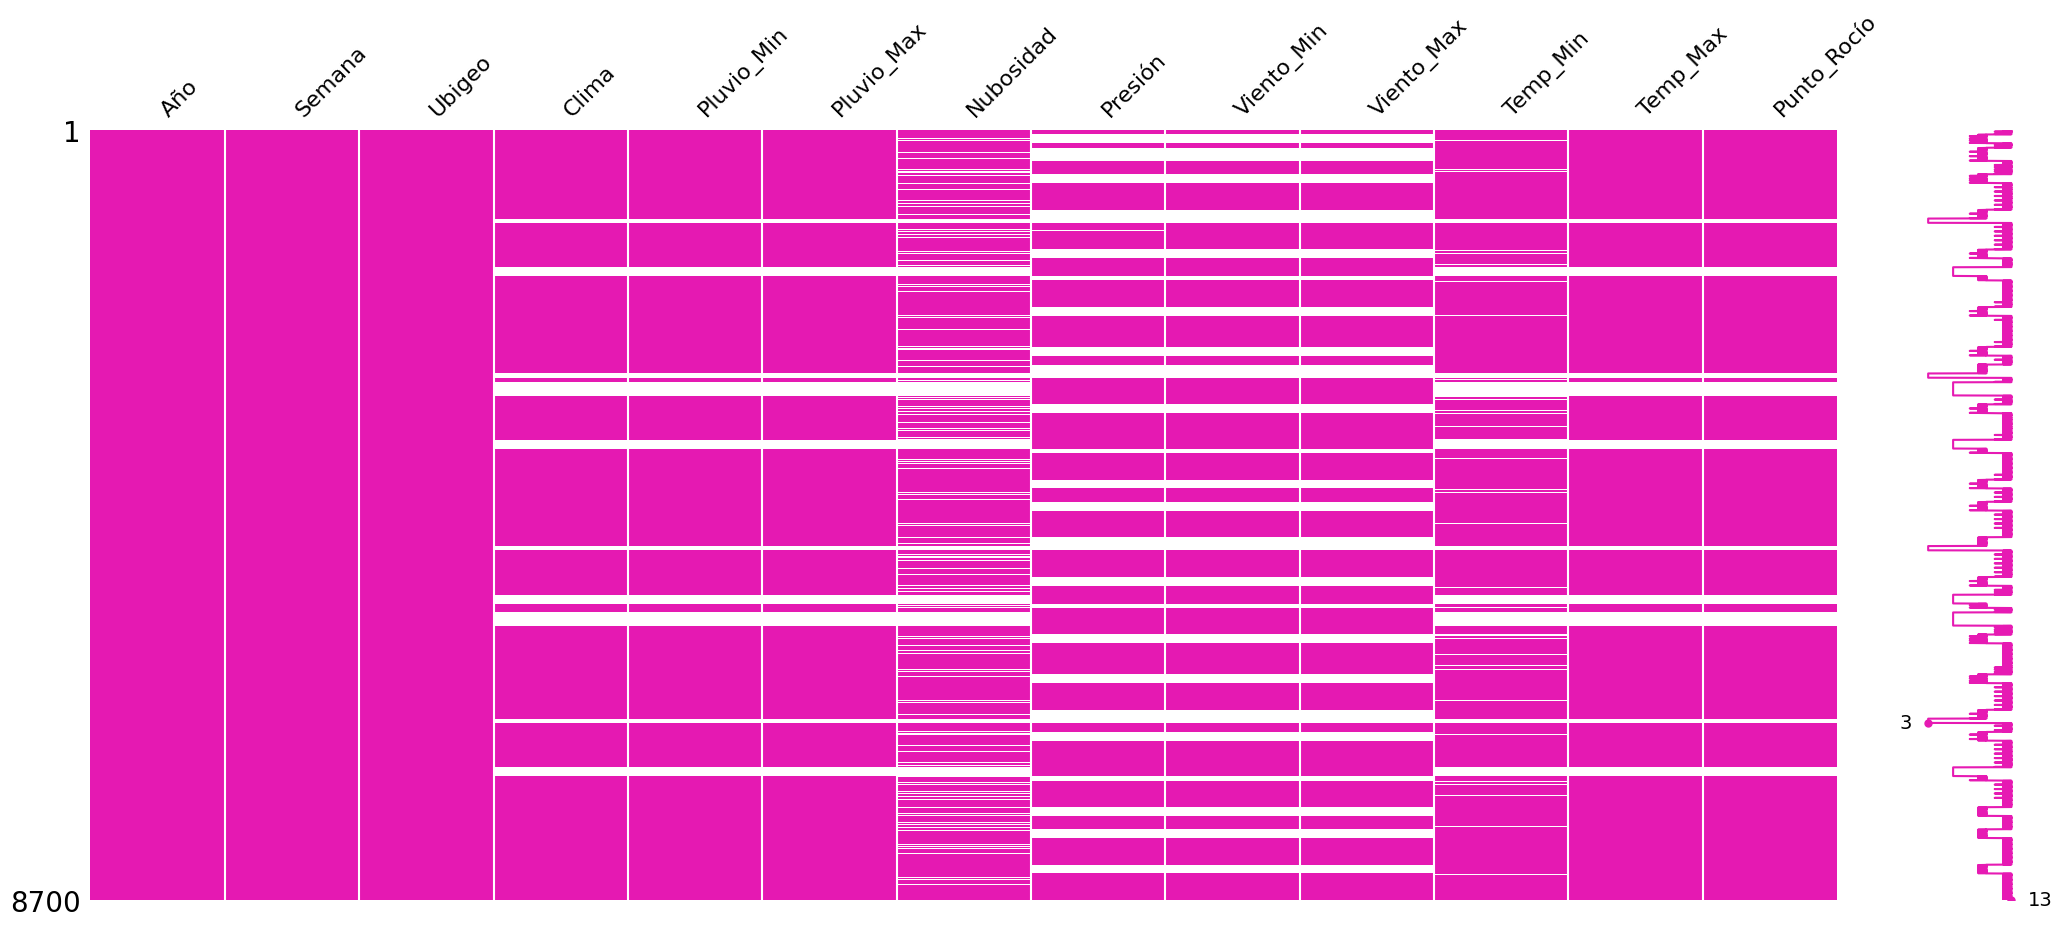

In [382]:
msno.matrix(sql_clima,color=(0.9,0.1,0.7))

In [383]:
sql_clima.drop(columns=['Clima','Nubosidad'],inplace=True)
sql_clima = interpol(sql_clima,list(sql_clima.columns)[3:],[])
sql_clima = sql_clima.interpolate(method='pchip')

<Axes: >

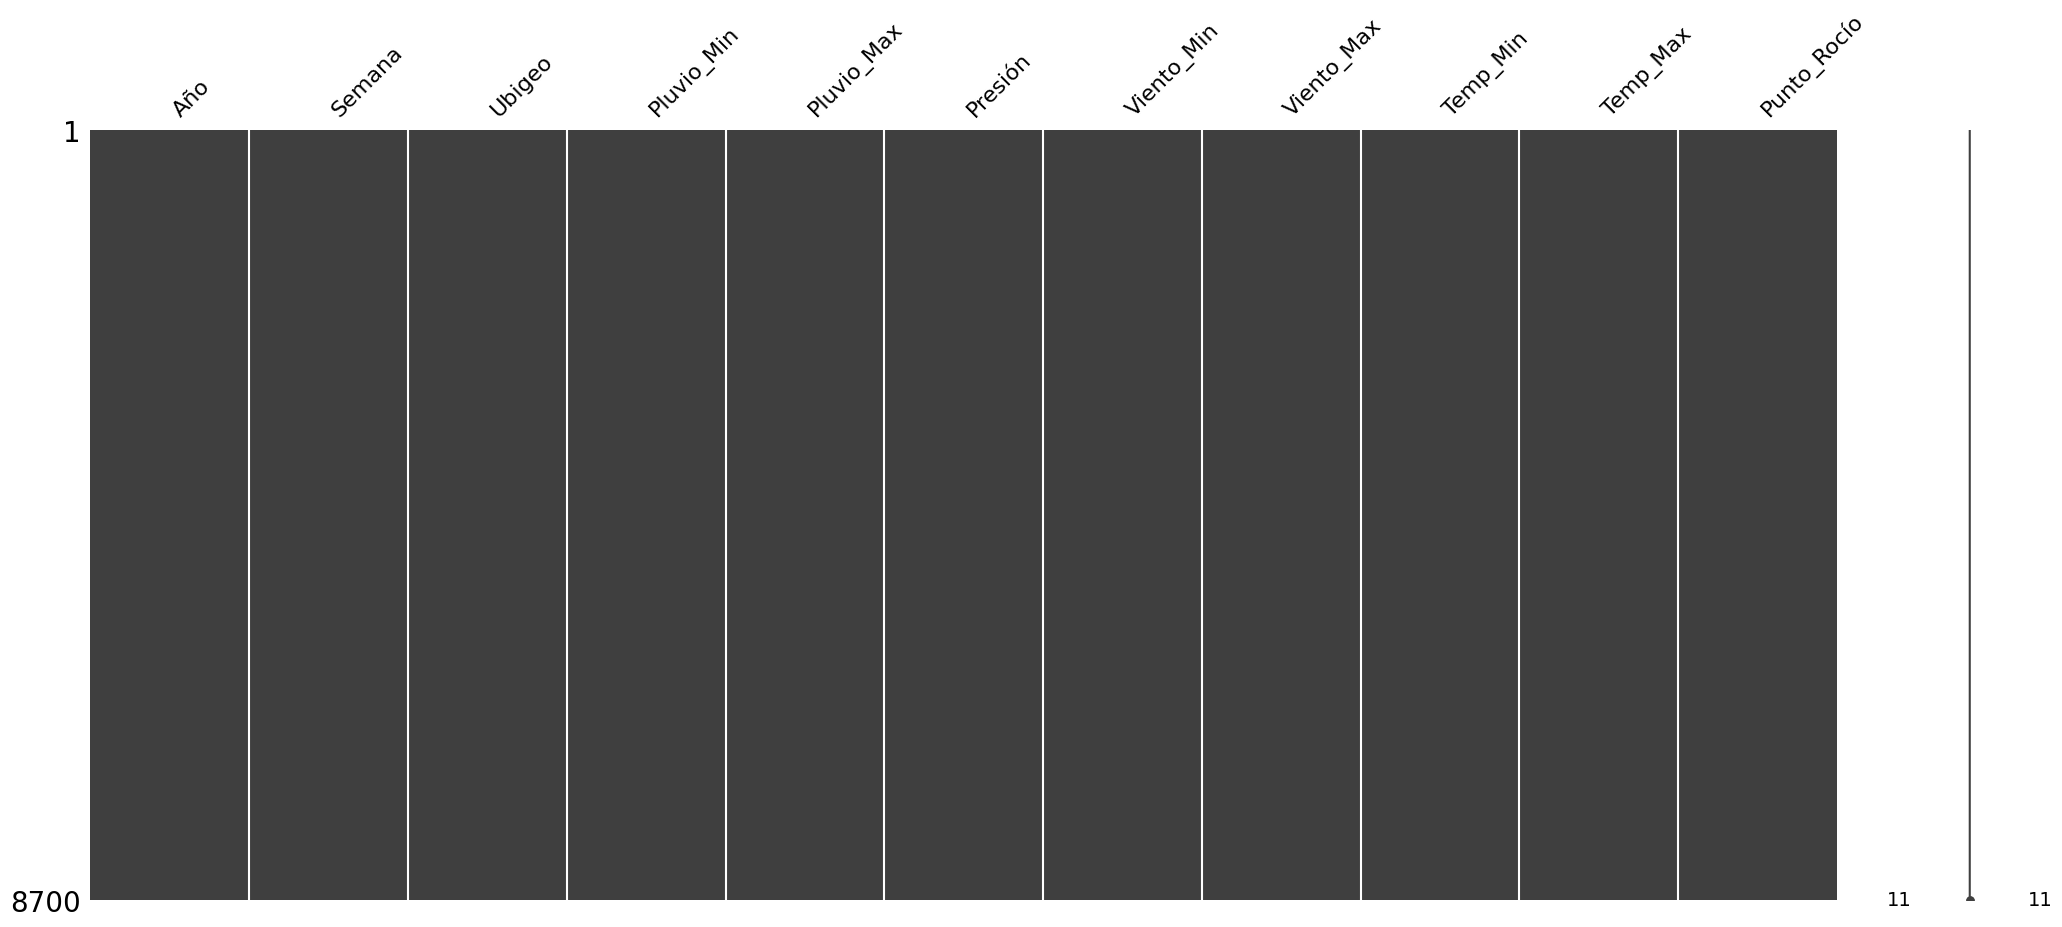

In [384]:
msno.matrix(sql_clima)

In [385]:
sql_clima.to_excel('datasets\clima.xlsx')

In [354]:
epa_clima.describe()

,Año,Semana,Ubigeo,Pluvio_Min,Pluvio_Max,Nubosidad,Presión,Viento_Min,Viento_Max,Temp_Min,Temp_Max,Punto_Rocío
count,8700.000000,8700.000000,8700.000000,8700.000000,8700.000000,8700.000000,8700.000000,8700.000000,8700.000000,8700.000000,8700.000000,8700.000000
mean,2022.206897,24.741379,138919.480000,0.011847,0.000290,0.548012,1005.617096,5.628141,13.016896,17.860753,21.950369,16.081073
std,0.984276,15.217200,27766.806518,0.077717,0.006695,0.273595,76.679549,4.101672,2.599466,3.170814,3.437870,2.896060
min,2021.000000,1.000000,70101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-128.000000,14.000000,3.000000
25%,2021.000000,11.000000,150106.000000,0.000000,0.000000,0.300000,1012.000000,3.042333,11.000000,16.000000,19.000000,14.000000
50%,2022.000000,23.500000,150118.500000,0.000000,0.000000,0.600000,1013.102959,5.000000,13.000000,18.000000,22.000000,16.000000
75%,2023.000000,38.000000,150131.000000,0.000000,0.000000,0.800000,1015.000000,7.000000,14.991475,20.000000,24.989032,18.000000
max,2024.000000,52.000000,150143.000000,1.600000,0.300000,1.000000,1020.000000,254.000000,25.000000,24.000000,31.000000,24.000000


In [9]:
from datetime import datetime
import pandas as pd

time_series = pd.DataFrame(pd.date_range(start=datetime(2021,1,1),end=datetime(2024,12,31),freq='W-MON'), columns=['Date'])
time_series['Year'],time_series['Week'],_ = zip(*time_series['Date'].map(lambda d: d.isocalendar()))
time_series['Month'] = time_series['Date'].dt.month
time_series['Month_week'] = time_series.groupby(['Year','Month']).cumcount() + 1

time_series.drop(columns=['Date'],index=[208],inplace=True)
time_series = time_series[['Year','Month','Month_week','Week']]
time_series.columns = ['Año','Mes','Semana del mes','Semana']
time_series.reset_index(inplace=True,names=['Temp'])
time_series = time_series.loc[~(( time_series['Año']==2024)   & (time_series['Semana']>23  )  ),:]
time_series

,Temp,Año,Mes,Semana del mes,Semana
0,0,2021,1,1,1
1,1,2021,1,2,2
2,2,2021,1,3,3
3,3,2021,1,4,4
4,4,2021,2,1,5
...,...,...,...,...,...
174,174,2024,5,1,19
175,175,2024,5,2,20
176,176,2024,5,3,21
177,177,2024,5,4,22


In [12]:
all_dists = pd.read_csv('datasets\sql_distritos.csv')

combo = pd.MultiIndex.from_product([time_series['Temp'],all_dists['Ubigeo']],names=['Temp','Ubigeo']).to_frame(index=False)
combo = pd.merge(left=combo,right=time_series,how='left',on='Temp')
combo = pd.merge(left=combo,right=all_dists,how='left',on='Ubigeo')
combo = combo[['Año','Mes','Semana del mes','Semana','Ubigeo','Provincia','Distrito']]

for column in combo.columns[:4]:
    combo[column] = combo[column].astype('category')
    
combo = combo[['Año','Semana','Ubigeo','Provincia','Distrito']]

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\PC\AppData\Local\Temp\ipykernel_30292\2320499440.py:1: SyntaxWarning: invalid escape sequence '\s'
  all_dists = pd.read_csv('datasets\sql_distritos.csv')


In [15]:
sql_dengue = pd.merge(left=combo,right=base_dengue,how='left',on=['Año','Semana','Provincia','Distrito'])

sql_dengue.drop(columns=['Provincia','Distrito'],inplace=True)
sql_dengue.fillna(0,inplace=True)
sql_dengue.to_csv(r'datasets\sql_dengue.csv')

In [47]:
enapres = pd.read_excel('datasets/saneamiento/enapres.xlsx')
enapres = enapres[['ANIO','MES','nombprov','nombdist'] + list(enapres.columns[21:])].drop(columns=['NOMBREDD','NOMBREPP'])
enapres.columns = ['Año','Mes','Provincia','Distrito'] + list(enapres.columns[4:])
enapres['Semana del mes'] = 1
enapres = enapres.loc[~enapres['Año'].isin(['2020'])]

for column in ['Año','Mes','Semana del mes']:
    enapres[column] = enapres[column].astype('category')

sql_enapres = pd.merge(left=combo,right=enapres,how='left',on=['Año','Mes','Semana del mes','Provincia','Distrito']).drop(columns=['Provincia','Distrito'])

riesgo = pd.read_excel('datasets/saneamiento/riesgo.xlsx')
riesgo = riesgo[['ANIO','MES','nombprov','nombdist'] + list(riesgo.columns[21:])].drop(columns=['NOMBREDD','NOMBREPP'])
riesgo.columns = ['Año','Mes','Provincia','Distrito'] + list(riesgo.columns[4:])
riesgo['Semana del mes'] = 1
riesgo = riesgo.loc[~riesgo['Año'].isin(['2020'])]

for column in ['Año','Mes','Semana del mes']:
    riesgo[column] = riesgo[column].astype('category')

sql_riesgo = pd.merge(left=combo,right=riesgo,how='left',on=['Año','Mes','Semana del mes','Provincia','Distrito']).drop(columns=['Provincia','Distrito'])

enapres_plus = pd.merge(left=sql_enapres,right=sql_riesgo,how='inner',on=['Año','Mes','Semana del mes','Semana','Ubigeo'])
enapres_plus.to_csv(r'datasets\saneamiento\previo_imputacion\sql_enapres.csv',index=False)

In [58]:
endes = pd.read_excel('datasets/saneamiento/endes.xlsx')
endes = endes[['año','nombprov_x','nombdist'] + list(endes.columns[22:])].drop(columns=['nombprov_y','ubigeo_y'])
endes.columns = ['Año','Provincia','Distrito'] + list(endes.columns[3:])
endes['Semana'] = 1
endes = endes.loc[~endes['Año'].isin([2020])]

for column in ['Año','Semana']:
    endes[column] = endes[column].astype('category')

sql_endes = pd.merge(left=combo,right=endes,how='left',on=['Año','Semana','Provincia','Distrito']).drop(columns=['Provincia','Distrito'])
sql_endes.to_csv(r'datasets\saneamiento\previo_imputacion\sql_endes.csv',index=False)

In [69]:
endes_pre = sql_endes[sql_endes['Semana']==1].drop(columns=['Mes','Semana del mes'])

Text(0.5, 1.0, 'Nulos en ENDES')

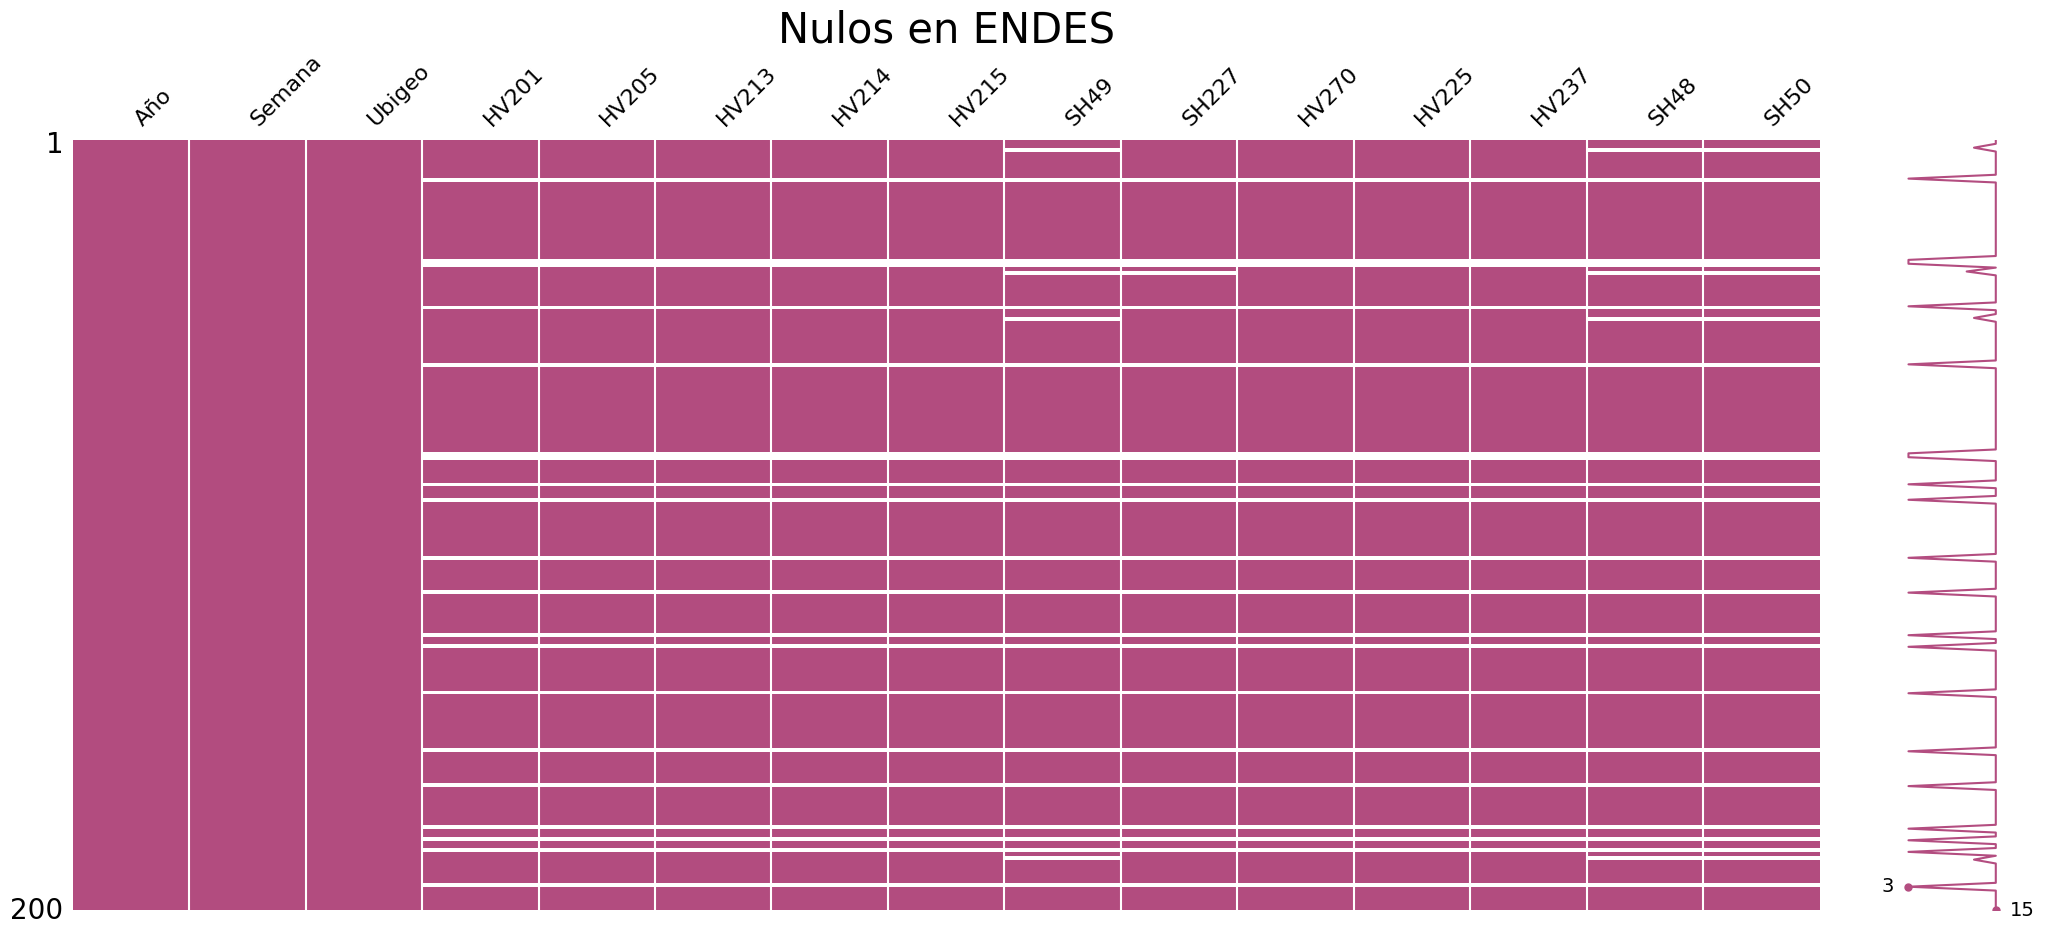

In [88]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(endes_pre,color=(0.7,0.3,0.5))
plt.title('Nulos en ENDES',fontsize=30)

Text(0.5, 1.0, 'Nulos en ENAPRES')

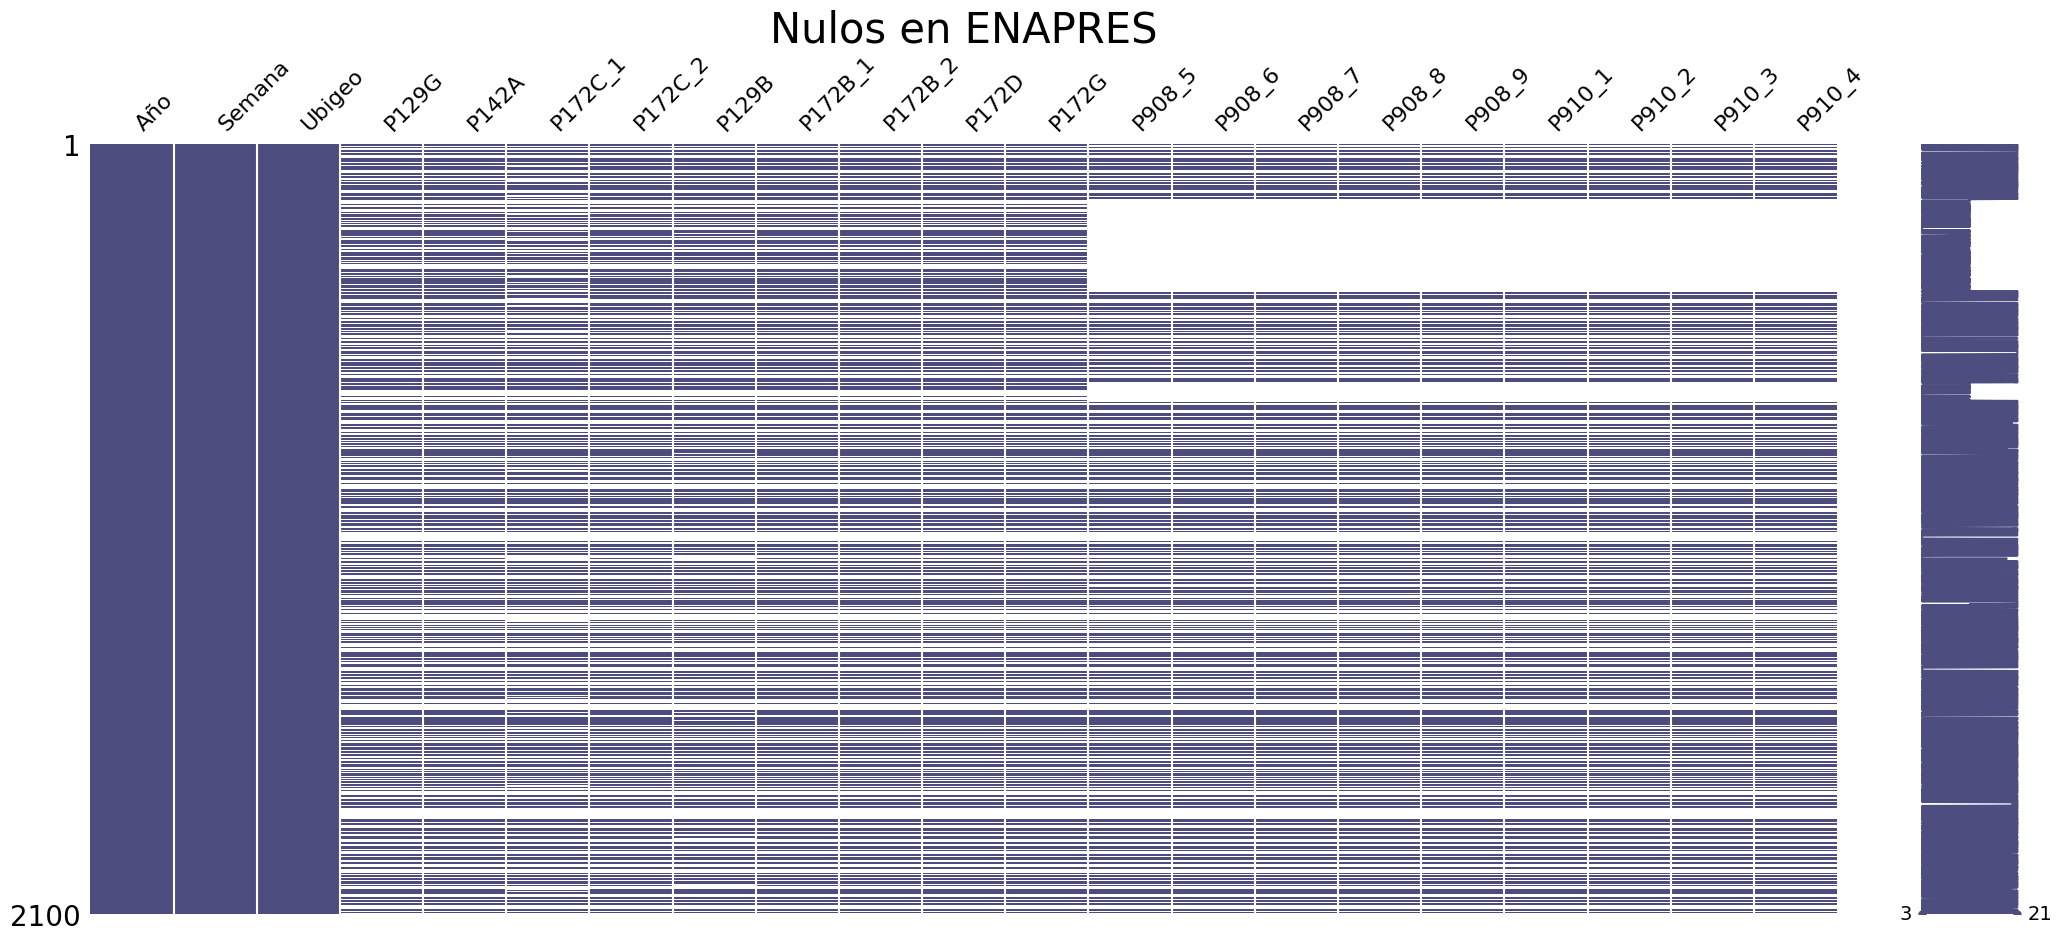

In [92]:
enapres_pre = enapres_plus[enapres_plus['Semana del mes']==1].drop(columns=['Mes','Semana del mes'])
msno.matrix(enapres_pre,color=(0.3,0.3,0.5))
plt.title('Nulos en ENAPRES',fontsize=30)

# 2. Imputación de distritos aledaños

In [217]:
from shapely.geometry import Polygon
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np
import geopandas as gpd

def add_geometry(df):
    all_dists = pd.read_csv(r'datasets\sql_distritos.csv')
    
    gdf = pd.merge(left=df,right=all_dists,how='left',on='Ubigeo')
    gdf = gdf[list(df.columns) + ['Polígono']]
    gdf.columns = list(df.columns) + ['geometry']
    gdf['geometry'] = gpd.GeoSeries.from_wkt(gdf['geometry'])
    gdf = gpd.GeoDataFrame(gdf,geometry='geometry')
    
    return gdf

def SpatialModeller(gdf,col_obj,type='categorical'): 
    gdf['area'] = gdf.geometry.area
    gdf['perimetro'] = gdf.geometry.length
    gdf['centroide_x'] = gdf.geometry.centroid.x
    gdf['centroide_y'] = gdf.geometry.centroid.y
    
    y = gdf[col_obj]
    gdf.drop(columns=[col_obj,'geometry'],inplace=True)
    
    match type:
        case 'numerical':
            model = RandomForestRegressor(random_state=42)
            params = {'n_estimators':np.linspace(start=10,stop=100,num=7,dtype=int),
                      'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
                      'max_depth':np.linspace(start=2,stop=50,num=5,dtype=int).tolist()+[None],
                      'min_samples_leaf':np.linspace(start=1,stop=25,num=7,dtype=int),
                      'min_samples_split':np.linspace(start=2,stop=25,num=7,dtype=int),
                      'max_features':['sqrt','log2']}
            rs = RandomizedSearchCV(estimator=model,
                                    param_distributions=params,
                                    n_iter=30,
                                    cv=3,
                                    n_jobs=-1,
                                    random_state=42)
            rs.fit(gdf,y)
            
        case 'categorical':
            model = RandomForestClassifier(random_state=42)
            params = {'n_estimators':np.linspace(start=10,stop=100,num=7,dtype=int),
                      'criterion':['gini','entropy','log_loss'],
                      'max_depth':np.linspace(start=2,stop=50,num=5,dtype=int).tolist()+[None],
                      'min_samples_leaf':np.linspace(start=1,stop=25,num=7,dtype=int),
                      'min_samples_split':np.linspace(start=2,stop=25,num=7,dtype=int),
                      'max_features':['sqrt','log2']}
            rs = RandomizedSearchCV(estimator=model,
                                    param_distributions=params,
                                    n_iter=30,
                                    cv=3,
                                    n_jobs=-1,
                                    random_state=42)
            rs.fit(gdf,y)
        case _:
            raise ValueError('Tipo de modelo no identificado.')
    return rs.best_estimator_

def SpatialImputator(df:pd.DataFrame,col_obj:str,tempo:str='weekly'):
    df = df.copy()
    semanas = df['Semana'].unique()
    años = df['Año'].unique()
    gdf = add_geometry(df)
    
    match gdf[col_obj].dtype:
        case 'float64':
            dtype = 'numerical'
        case 'Int64':
            dtype = 'categorical'
    
    if tempo=='weekly':
        for año in años:
            for semana in semanas:
                gdf_semana = gdf[(gdf['Semana']==semana)&(gdf['Año']==año)]
                null_dist = gdf_semana[gdf_semana[col_obj].isnull()]['Ubigeo']
                
                full_dist = gdf_semana[gdf_semana[col_obj].notnull()].drop(columns=['Año','Semana','Ubigeo'])
                try:
                    spatial_imputer = SpatialModeller(full_dist,col_obj,dtype)
                except:
                    continue
            
                for distrito in null_dist:
                    x_distrito = gdf_semana[gdf_semana['Ubigeo']==distrito]  
                    
                    x_distrito['area'] = x_distrito.geometry.area
                    x_distrito['perimetro'] = x_distrito.geometry.length
                    x_distrito['centroide_x'] = x_distrito.geometry.centroid.x
                    x_distrito['centroide_y'] = x_distrito.geometry.centroid.y
                    
                    x_distrito.drop(columns=['Año','Semana','Ubigeo',col_obj,'geometry'],inplace=True)     
                    
                    try:
                        imputed = spatial_imputer.predict(x_distrito)
                        df.loc[(df['Año']==año) & (df['Semana']==semana) & (df['Ubigeo']==distrito), col_obj] = imputed
                    except:
                        continue
    elif tempo=='annual':
        for año in años:
            gdf_año = gdf[(gdf['Año']==año)]
            full_dist = gdf_año[gdf_año[col_obj].notnull()].drop(columns=['Año','Semana','Ubigeo'])
            
            try:
                spatial_imputer = SpatialModeller(full_dist,col_obj,dtype)
            except:
                continue
            
            for semana in semanas:
                gdf_semana = gdf[(gdf['Semana']==semana)&(gdf['Año']==año)]
                null_dist = gdf_semana[gdf_semana[col_obj].isnull()]['Ubigeo']
            
                for distrito in null_dist:
                    x_distrito = gdf_semana[gdf_semana['Ubigeo']==distrito]  
                    
                    x_distrito['area'] = x_distrito.geometry.area
                    x_distrito['perimetro'] = x_distrito.geometry.length
                    x_distrito['centroide_x'] = x_distrito.geometry.centroid.x
                    x_distrito['centroide_y'] = x_distrito.geometry.centroid.y
                    
                    x_distrito.drop(columns=['Año','Semana','Ubigeo',col_obj,'geometry'],inplace=True)     
                    
                    try:
                        imputed = spatial_imputer.predict(x_distrito)
                        df.loc[(df['Año']==año) & (df['Semana']==semana) & (df['Ubigeo']==distrito), col_obj] = imputed
                    except:
                        continue
    
    
    return df
            
def district_imputation(df: pd.DataFrame,vars: list, tempo: str = 'weekly'):
    sorted_vars = sorted(vars,key=lambda x: df[x].isnull().sum(),reverse=True)

    for var in sorted_vars:
        df = SpatialImputator(df,var,tempo)
        
    return df

In [205]:
import warnings
warnings.filterwarnings('ignore')

endes_cat = list(endes_pre.columns[3:11])
endes_num = list(endes_pre.columns[11:])

def formalize_categories(df,num_vars,cat_vars):
    for cat in num_vars:
        df[cat] = pd.to_numeric(df[cat],errors='coerce').astype('float64')
    for cat in cat_vars:
        df[cat] = pd.to_numeric(df[cat],errors='coerce').astype('Int64')
        
    return df

hey_endes_pre = formalize_categories(endes_pre.copy(),endes_num,endes_cat)
import_endes_pre = district_imputation(district_imputation(hey_endes_pre,endes_cat+endes_num),endes_cat+endes_num)
import_endes_pre

,Año,Semana,Ubigeo,HV201,HV205,HV213,HV214,HV215,SH49,SH227,HV270,HV225,HV237,SH48,SH50
0,2021,1,150102,1,1,5,2,1,3,1,2,0.076923,0.961538,1.000000,1.000000
1,2021,1,150103,1,1,5,2,1,3,1,3,0.138614,0.990196,1.000000,0.992308
2,2021,1,150104,1,1,2,2,1,3,1,3,0.111111,1.000000,0.948470,0.902959
3,2021,1,70102,1,1,5,2,1,3,1,4,0.053030,0.954545,0.945205,0.876712
4,2021,1,150105,1,1,4,2,1,3,0,4,0.115385,1.000000,1.000000,0.956522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7845,2024,1,150140,1,1,4,2,1,3,1,4,0.000000,0.980000,0.885714,0.857143
7846,2024,1,150141,1,1,4,2,1,3,1,4,0.176471,1.000000,1.000000,0.960000
7847,2024,1,70106,1,1,5,2,2,3,1,2,0.080235,0.976699,0.985772,0.971545
7848,2024,1,150142,1,1,5,2,1,3,1,3,0.139344,0.991803,0.991525,0.991525


<Axes: >

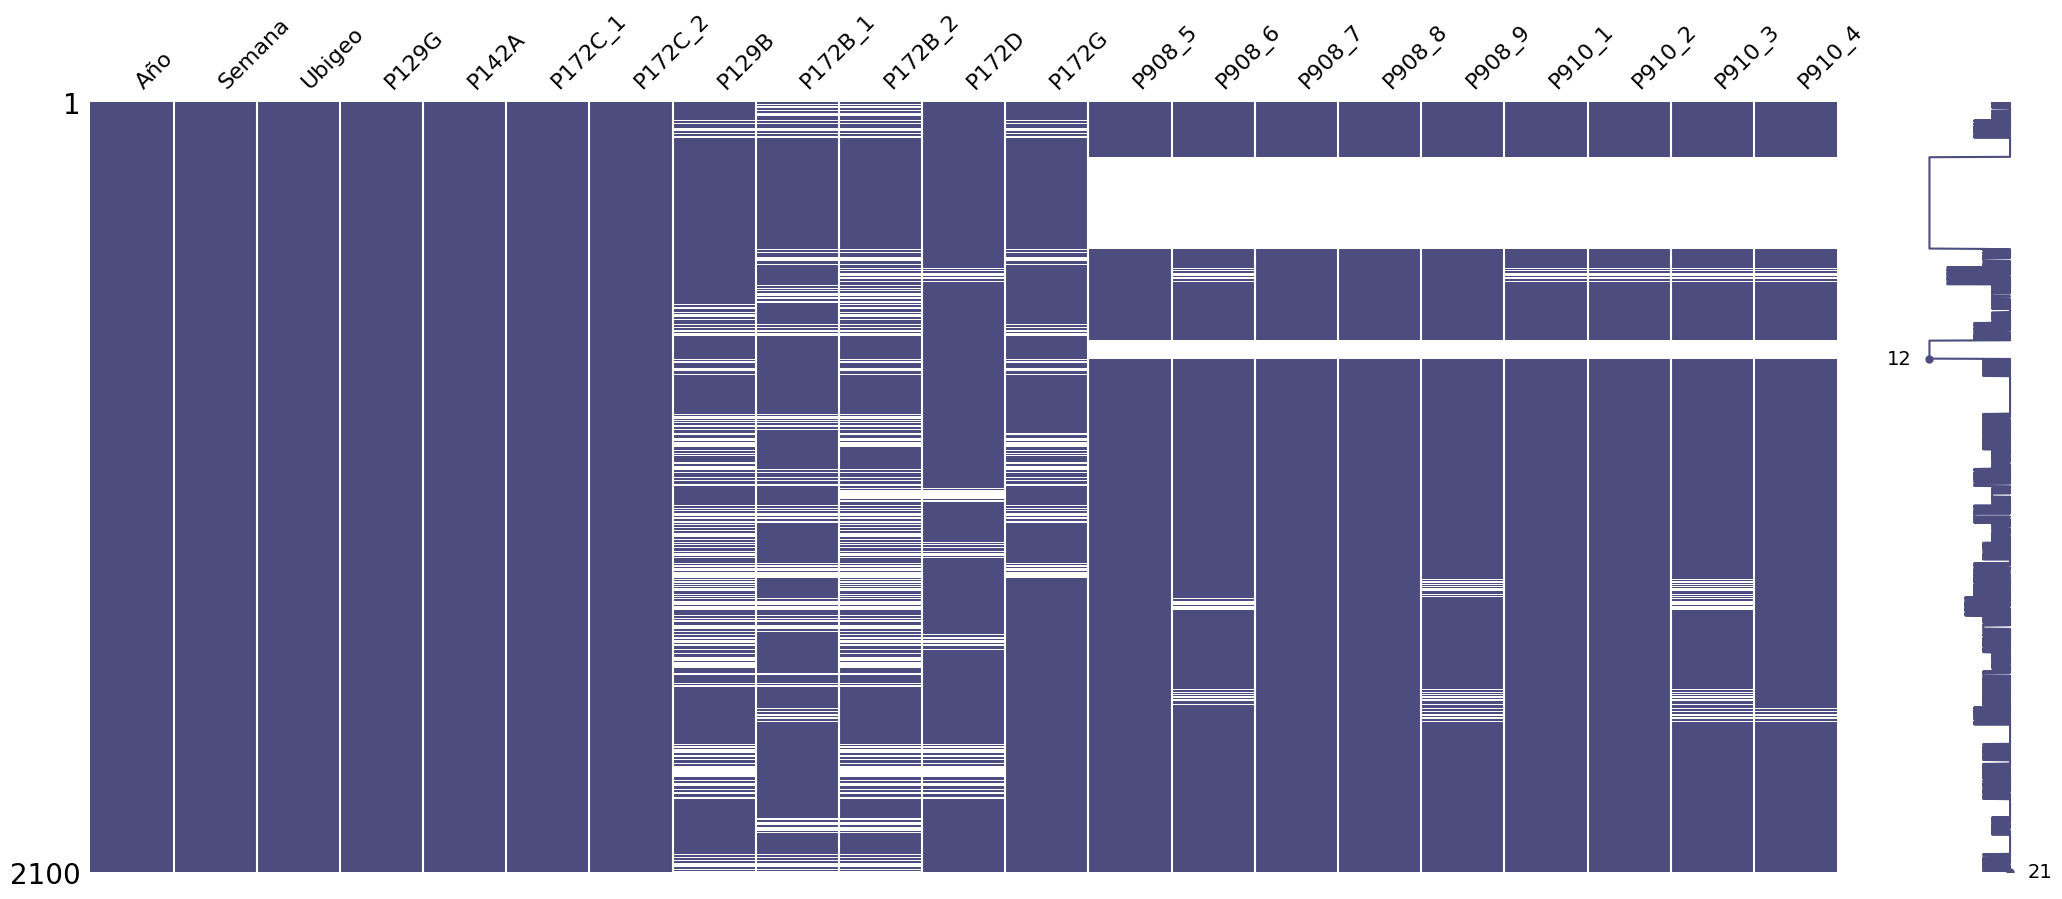

In [214]:
enapres_num = [
    'P908_5',
    'P908_6',
    'P908_7',
    'P908_8',
    'P908_9',
    'P910_1',
    'P910_2',
    'P910_3',
    'P910_4',
    'P172D',
    'P172G',
    'P172B_2',
    'P172B_1',
    'P129B'
]

enapres_cat = [
    'P129G',
    'P142A',
    'P172C_1',
    'P172C_2',
]

hey_enapres_pre = formalize_categories(enapres_pre.copy(),enapres_num,enapres_cat)
import_enapres_pre = district_imputation(district_imputation(hey_enapres_pre,enapres_cat+enapres_num),enapres_cat+enapres_num)
msno.matrix(import_enapres_pre,color=(0.3,0.3,0.5))

<Axes: >

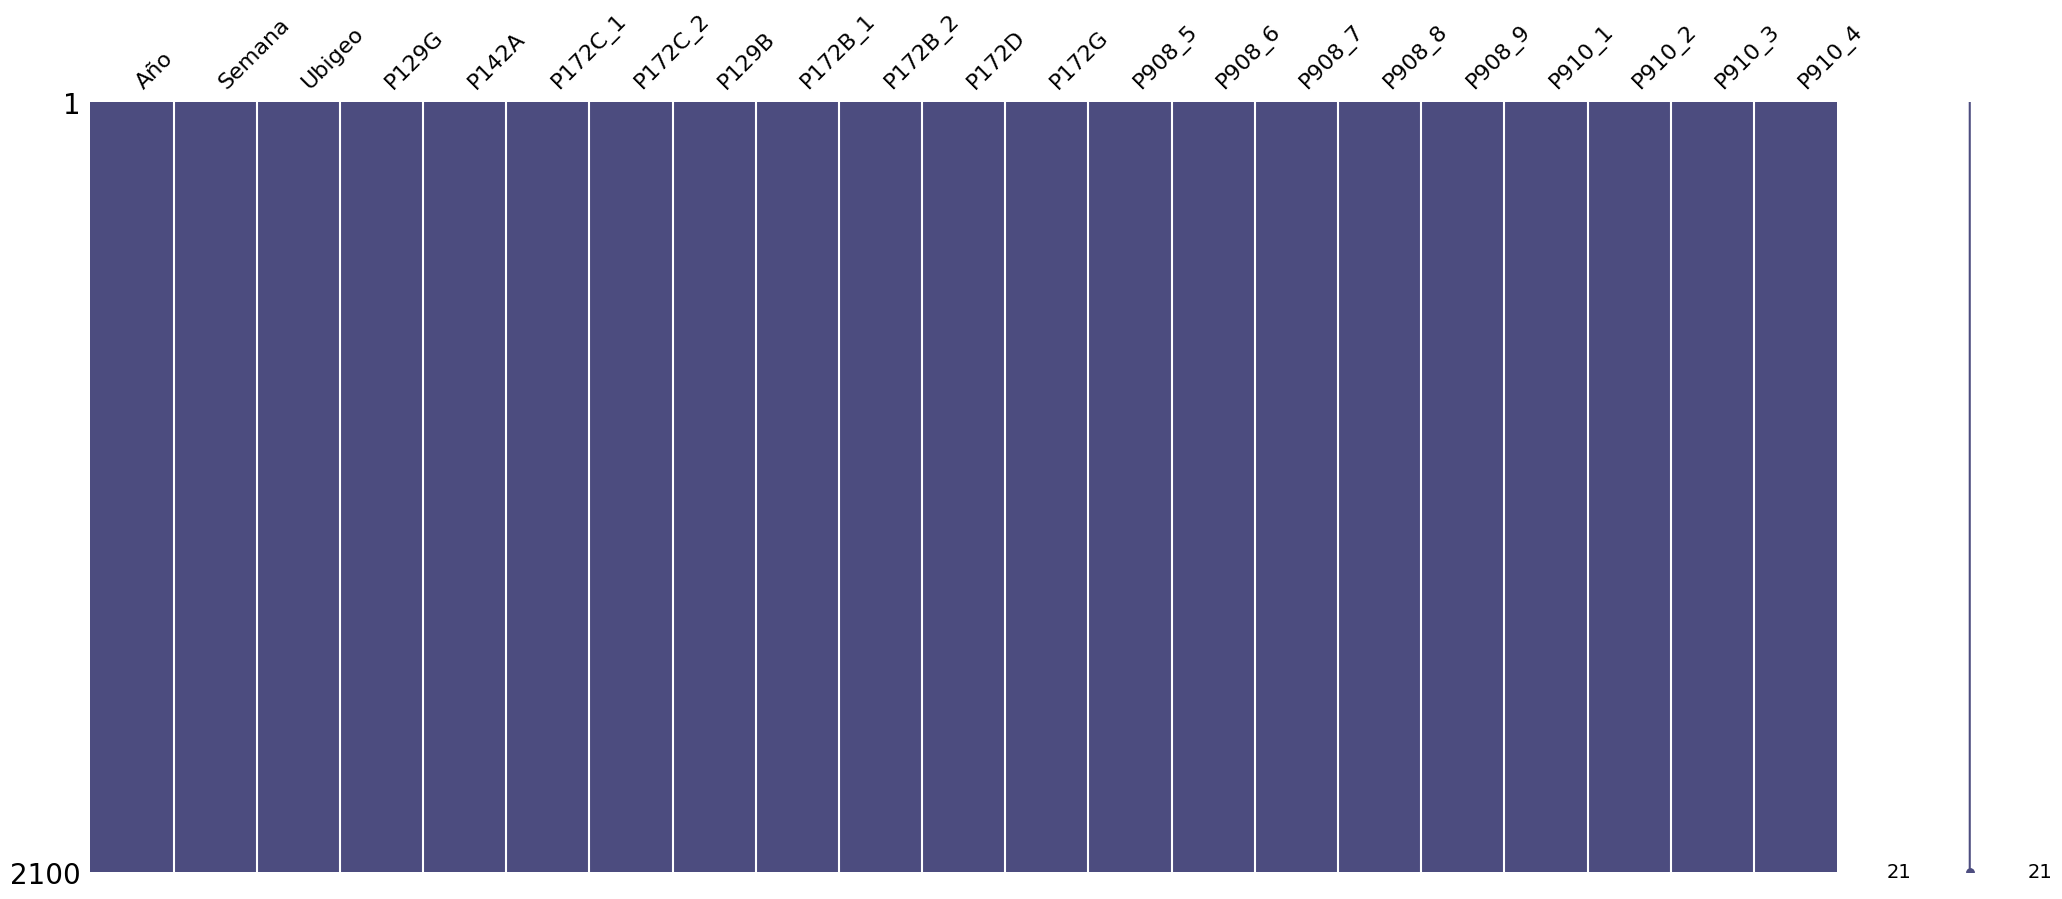

In [219]:
import_enapres_pre2 = district_imputation(district_imputation(import_enapres_pre,enapres_cat+enapres_num,tempo='annual'),enapres_cat+enapres_num,tempo='weekly')
msno.matrix(import_enapres_pre2,color=(0.3,0.3,0.5))

In [224]:
import_endes_pre.to_excel(r'datasets\saneamiento\previo_interpolacion\sql_endes.xlsx',index=False)
import_enapres_pre2.to_csv(r'datasets\saneamiento\previo_interpolacion\sql_enapres.csv',index=False)

In [226]:
heyyy = import_enapres_pre2.groupby(by=['Año','Ubigeo'])
heyyy.describe()

P129G                                         P142A            \
            count mean       std  min  25%  50%  75%  max count      mean   
Año  Ubigeo                                                                 
2021 70101   12.0  1.0       0.0  1.0  1.0  1.0  1.0  1.0  12.0       1.0   
     70102   12.0  1.0       0.0  1.0  1.0  1.0  1.0  1.0  12.0       1.0   
     70103   12.0  1.0       0.0  1.0  1.0  1.0  1.0  1.0  12.0       1.0   
     70104   12.0  1.0       0.0  1.0  1.0  1.0  1.0  1.0  12.0       1.0   
     70105   12.0  1.0       0.0  1.0  1.0  1.0  1.0  1.0  12.0       1.0   
...           ...  ...       ...  ...  ...  ...  ...  ...   ...       ...   
2024 150139   6.0  1.5  1.224745  1.0  1.0  1.0  1.0  4.0   6.0  1.666667   
     150140   6.0  1.0       0.0  1.0  1.0  1.0  1.0  1.0   6.0       1.0   
     150141   6.0  1.0       0.0  1.0  1.0  1.0  1.0  1.0   6.0       1.0   
     150142   6.0  1.0       0.0  1.0  1.0  1.0  1.0  1.0   6.0       1.0   
     150143   6.0  1.0       0.0  1.0  1.0  1.0  1.0  1.0   6.0       1.0   

             ...    P910_3           P910_4                           \
             ...       75%       max  count      mean       std  min   
Año  Ubigeo  ...                                                       
2021 70101   ...  0.002153  0.004396   12.0  0.018573  0.015312  0.0   
     70102   ...  0.002295  0.003567   12.0  0.008096  0.011613  0.0   
     70103   ...  0.004057  0.004595   12.0  0.010981  0.012479  0.0   
     70104   ...  0.007098  0.125000   12.0  0.031887  0.080492  0.0   
     70105   ...  0.004816  0.007928   12.0  0.023949  0.019315  0.0   
...          ...       ...       ...    ...       ...       ...  ...   
2024 150139  ...  0.022167  0.024977    6.0  0.109483  0.158588  0.0   
     150140  ...  0.019160  0.071429    6.0  0.049870  0.083192  0.0   
     150141  ...  0.014643  0.023377    6.0  0.019351  0.018761  0.0   
     150142  ...  0.024196  0.111111    6.0  0.043083  0.049175  0.0   
     150143  ...  0.021957  0.238095    6.0  0.099357  0.125003  0.0   

                                                     
                  25%       50%       75%       max  
Año  Ubigeo                                          
2021 70101   0.000000  0.021808  0.030844  0.039513  
     70102   0.000000  0.000000  0.014107  0.031088  
     70103   0.000000  0.006092  0.020239  0.029186  
     70104   0.000000  0.008755  0.021564  0.285714  
     70105   0.010402  0.028326  0.029950  0.069405  
...               ...       ...       ...       ...  
2024 150139  0.041711  0.053900  0.075635  0.428571  
     150140  0.000000  0.020779  0.042922  0.214286  
     150141  0.001997  0.020103  0.033899  0.041440  
     150142  0.000000  0.035231  0.075308  0.111111  
     150143  0.014522  0.064736  0.117846  0.333333  

[200 rows x 144 columns]

# 3. Interpolación semanal

In [240]:
import numpy as np
from scipy.stats import entropy

def calc_entropy(series: pd.Series):
    if all(series.isna()):
        return np.nan
    
    series = series.dropna()
    probabilities = series.value_counts()/len(series)
    return entropy(probabilities)

def analyze_dataframe(df, ubigeo_col, numerical_cols, categorical_cols):
    result = []

    for ubigeo, group in df.groupby(ubigeo_col):
        numeric_stats = (- group[numerical_cols].quantile(0.25) + group[numerical_cols].quantile(0.75)).tolist()
        categorical_stats = [calc_entropy(group[col]) for col in categorical_cols]
        result.append([ubigeo] + numeric_stats + categorical_stats)

    column_names = ['Ubigeo'] + numerical_cols + categorical_cols
    result_df = pd.DataFrame(result, columns=column_names)

    multi_index = pd.MultiIndex.from_tuples(
        [('Ubigeo', '')] +
        [('Numéricas', col) for col in numerical_cols] +
        [('Categóricas', col) for col in categorical_cols]
    )
    
    # Asignar el multiíndice al DataFrame
    result_df.columns = multi_index
    
    return result_df.set_index('Ubigeo')

In [241]:
hey = analyze_dataframe(import_enapres_pre2,'Ubigeo',enapres_num,enapres_cat)

hey

Numéricas                                                              \
          P908_5    P908_6    P908_7    P908_8    P908_9    P910_1    P910_2   
Ubigeo                                                                         
70101   0.069642  0.030866  0.097732  0.077161  0.064136  0.035341  0.043603   
70102   0.007249  0.021635  0.040567  0.035964  0.114559  0.070180  0.009741   
70103   0.092952  0.091257  0.131406  0.095937  0.134022  0.083929  0.031128   
70104   0.027484  0.021790  0.064441  0.045468  0.083113  0.086235  0.021129   
70105   0.047673  0.037094  0.055569  0.079054  0.088357  0.040504  0.023113   
70106   0.276429  0.046217  0.210009  0.287975  0.111716  0.060707  0.056201   
70107   0.084888  0.039363  0.338331  0.156570  0.109897  0.053174  0.033054   
150101  0.090909  0.025748  0.137752  0.121711  0.092454  0.079315  0.024726   
150102  0.131764  0.028884  0.199785  0.147699  0.095756  0.035648  0.033805   
150103  0.110610  0.025422  0.222488  0.276786  0.339973  0.097765  0.141234   
150104  0.063851  0.020967  0.077201  0.070875  0.081719  0.050174  0.024135   
150105  0.037423  0.022993  0.057140  0.061668  0.056122  0.039084  0.023164   
150106  0.275352  0.038519  0.480706  0.352290  0.243562  0.052724  0.083117   
150107  0.064680  0.016019  0.138788  0.113499  0.106118  0.045542  0.018789   
150108  0.079442  0.026388  0.249584  0.183310  0.131859  0.090794  0.025098   
150109  0.072208  0.020704  0.145760  0.109479  0.110522  0.045623  0.031964   
150110  0.135606  0.029987  0.364509  0.236452  0.175352  0.082797  0.041877   
150111  0.038306  0.025394  0.130386  0.087264  0.158411  0.100457  0.027445   
150112  0.122939  0.028055  0.135254  0.176449  0.577887  0.079496  0.028621   
150113  0.044122  0.025882  0.083292  0.080265  0.091519  0.058852  0.026308   
150114  0.062212  0.026572  0.194365  0.155320  0.153046  0.074479  0.029835   
150115  0.045029  0.026572  0.119106  0.078523  0.114086  0.091994  0.021425   
150116  0.057938  0.028024  0.085201  0.073125  0.096515  0.051715  0.027836   
150117  0.061988  0.026749  0.114559  0.075549  0.122318  0.069956  0.020056   
150118  0.306281  0.026250  0.543609  0.480354  0.333896  0.061626  0.083273   
150119  0.158193  0.017680  0.272054  0.236397  0.169909  0.069731  0.044499   
150120  0.072832  0.023076  0.076519  0.085326  0.080665  0.035665  0.023100   
150121  0.030409  0.026286  0.082877  0.078174  0.092333  0.061185  0.023658   
150122  0.015542  0.025837  0.056648  0.070126  0.109130  0.058943  0.022430   
150123  0.107742  0.029914  0.472833  0.237466  0.183960  0.063798  0.070427   
150124  0.082424  0.019956  0.154943  0.111282  0.107335  0.048438  0.024389   
150125  0.215194  0.033083  0.488577  0.317976  0.502604  0.129076  0.048341   
150126  0.108433  0.013638  0.147214  0.202964  0.109943  0.051198  0.037901   
150127  0.100266  0.012761  0.142597  0.130635  0.113374  0.050311  0.034881   
150128  0.065138  0.030997  0.117280  0.087654  0.178193  0.067035  0.027912   
150129  0.115312  0.015472  0.166983  0.130506  0.111422  0.059090  0.026896   
150130  0.035894  0.025785  0.075313  0.075319  0.102169  0.059328  0.023308   
150131  0.036156  0.027458  0.086313  0.064046  0.123180  0.060891  0.023945   
150132  0.346097  0.045455  0.193669  0.252287  0.261615  0.097261  0.088889   
150133  0.123826  0.031513  0.185804  0.125691  0.157888  0.077035  0.033799   
150134  0.052577  0.022762  0.072407  0.068932  0.082427  0.055680  0.024135   
150135  0.079741  0.023949  0.339286  0.142741  0.051667  0.101404  0.033983   
150136  0.027611  0.027176  0.074924  0.069093  0.099885  0.059199  0.023687   
150137  0.035242  0.024173  0.122450  0.095102  0.149825  0.089176  0.041069   
150138  0.081263  0.020318  0.116222  0.124439  0.109306  0.049111  0.016416   
150139  0.076877  0.030230  0.098187  0.122851  0.101304  0.034693  0.019264   
150140  0.025138  0.012788  0.066307  0.099486  0.064920  0.022484  0.008190   
150141 

In [242]:
hey2 = analyze_dataframe(import_endes_pre,'Ubigeo',endes_num,endes_cat)
hey2

Numéricas                               Categóricas            \
           HV225     HV237      SH48      SH50       HV201     HV205   
Ubigeo                                                                 
70101   0.014190  0.014545  0.007164  0.010627    0.000000  0.000000   
70102   0.013642  0.021623  0.005410  0.036803    0.000000  0.000000   
70103   0.004092  0.023077  0.031622  0.033173    0.000000  0.000000   
70104   0.001067  0.022464  0.031980  0.036199    0.000000  0.000000   
70105   0.078057  0.075308  0.131089  0.152359    0.000000  0.000000   
70106   0.009181  0.004479  0.002524  0.007477    0.000000  0.000000   
70107   0.079496  0.022019  0.023695  0.023695    0.000000  0.000000   
150101  0.066300  0.006884  0.015317  0.014890    0.000000  0.000000   
150102  0.063248  0.037393  0.010870  0.035870    0.693147  0.562335   
150103  0.031369  0.007564  0.024331  0.023657    0.000000  0.000000   
150104  0.141026  0.019231  0.181049  0.146916    0.000000  0.000000   
150105  0.057794  0.014975  0.038655  0.074477    0.000000  0.000000   
150106  0.051735  0.016960  0.021547  0.031388    0.000000  0.000000   
150107  0.042125  0.014556  0.027584  0.026692    0.000000  0.000000   
150108  0.057853  0.008279  0.012046  0.016254    0.000000  0.000000   
150109  0.109776  0.005376  0.002775  0.005753    0.693147  0.693147   
150110  0.028273  0.015594  0.019560  0.028844    0.000000  0.000000   
150111  0.093758  0.022569  0.070816  0.047919    0.000000  0.000000   
150112  0.061282  0.014349  0.017788  0.036107    0.000000  0.000000   
150113  0.000000  0.000000  0.240625  0.240625    0.000000  0.000000   
150114  0.044501  0.000000  0.044792  0.054836    0.000000  0.000000   
150115  0.233559  0.031822  0.041346  0.045513    0.000000  0.000000   
150116  0.000000  0.000000  0.082609  0.142391    0.000000  0.000000   
150117  0.060631  0.009503  0.024165  0.028375    0.000000  0.000000   
150118  0.020304  0.010615  0.016526  0.010280    0.000000  0.000000   
150119  0.021957  0.000000  0.006944  0.046498    0.562335  0.693147   
150120  0.016667  0.029762  0.045109  0.055978    0.000000  0.000000   
150121  0.048864  0.034091  0.020269  0.036813    0.000000  0.000000   
150122  0.030458  0.010204  0.064732  0.111607    0.000000  0.000000   
150123  0.015653  0.005952  0.000000  0.009259    0.000000  0.000000   
150124  0.033179  0.011992  0.016063  0.026998    0.000000  0.000000   
150125  0.019027  0.006644  0.003937  0.010034    0.000000  0.000000   
150126  0.004243  0.008508  0.005609  0.003338    0.000000  0.000000   
150127  0.034537  0.010057  0.016201  0.028410    0.000000  1.039721   
150128  0.076471  0.008816  0.020396  0.024020    0.000000  0.000000   
150129  0.023614  0.049882  0.027771  0.039302    0.562335  0.562335   
150130  0.059028  0.000000  0.153566  0.151373    0.000000  0.000000   
150131  0.000000  0.019231  0.127273  0.162930    0.562335  0.000000   
150132  0.019864  0.004182  0.010277  0.007163    0.000000  0.000000   
150133  0.029057  0.002708  0.014216  0.025731    0.000000  0.000000   
150134  0.088182  0.032299  0.039278  0.090501    0.000000  0.000000   
150135  0.031669  0.001908  0.002741  0.005384    0.000000  0.000000   
150136  0.031147  0.009505  0.030914  0.077419    0.000000  0.000000   
150137  0.013694  0.044424  0.020330  0.018174    0.000000  0.000000   
150138  0.007279  0.010001  0.006878  0.006279    0.000000  0.000000   
150139  0.044449  0.052178  0.051786  0.051786    0.562335  1.039721   
150140  0.035714  0.007901  0.050458  0.047207    0.000000  0.000000   
150141  0.075368  0.013889  0.106875  0.102141    0.000000  0.000000   
150142  0.051476  0.024338  0.019396  0.010444    0.000000  0.000000   
150143  0.057737  0.008195  0.012226  0.020764    0.000000  0.000000   

                                                               
           HV213     HV214     HV215 SH49     SH227     HV270  
Ubigeo                                                        

In [365]:
combox = combo[['Año','Semana','Ubigeo']]

saneamiento_p1 = pd.merge(left=combox,right=import_enapres_pre2,how='left',on=['Año','Semana','Ubigeo'])

saneamiento_p2 = pd.merge(left=combox,right=import_endes_pre,how='left',on=['Año','Semana','Ubigeo'])
saneamiento_p2 = saneamiento_p2.loc[~((saneamiento_p2['Año']==2024) & (saneamiento_p2['Semana']>1)),:]

<Axes: >

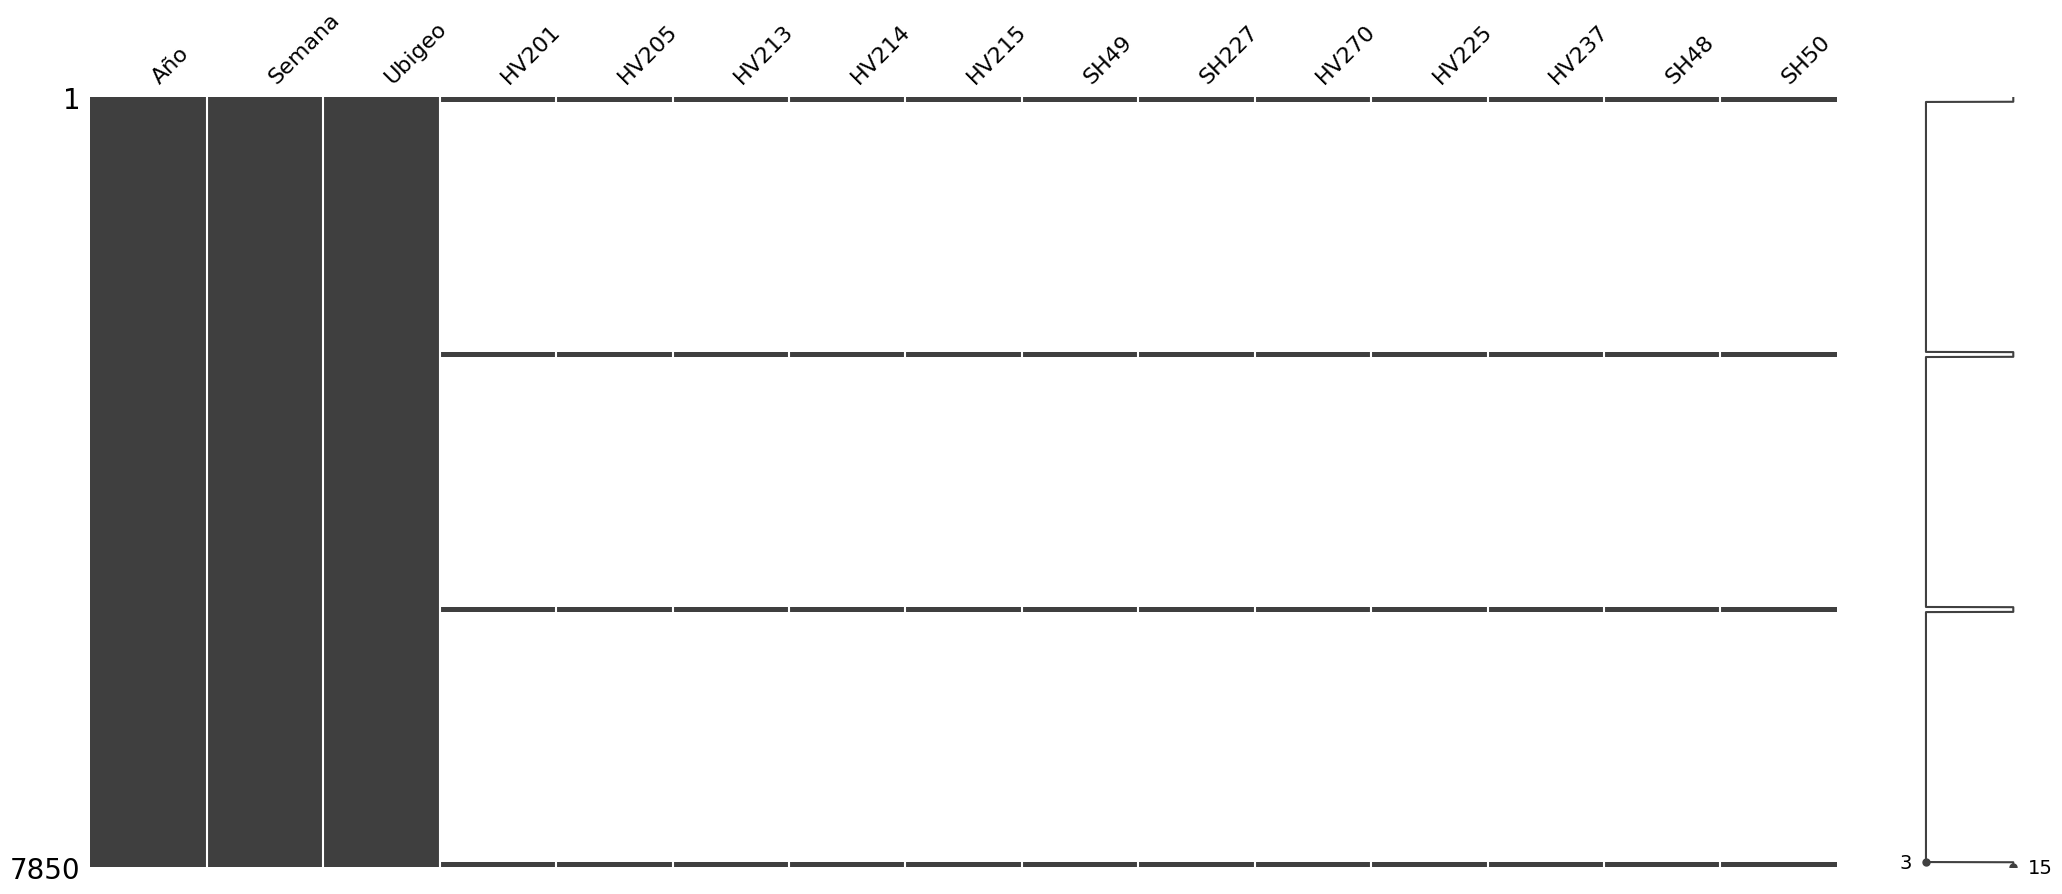

In [356]:
msno.matrix(saneamiento_p2)

<Axes: >

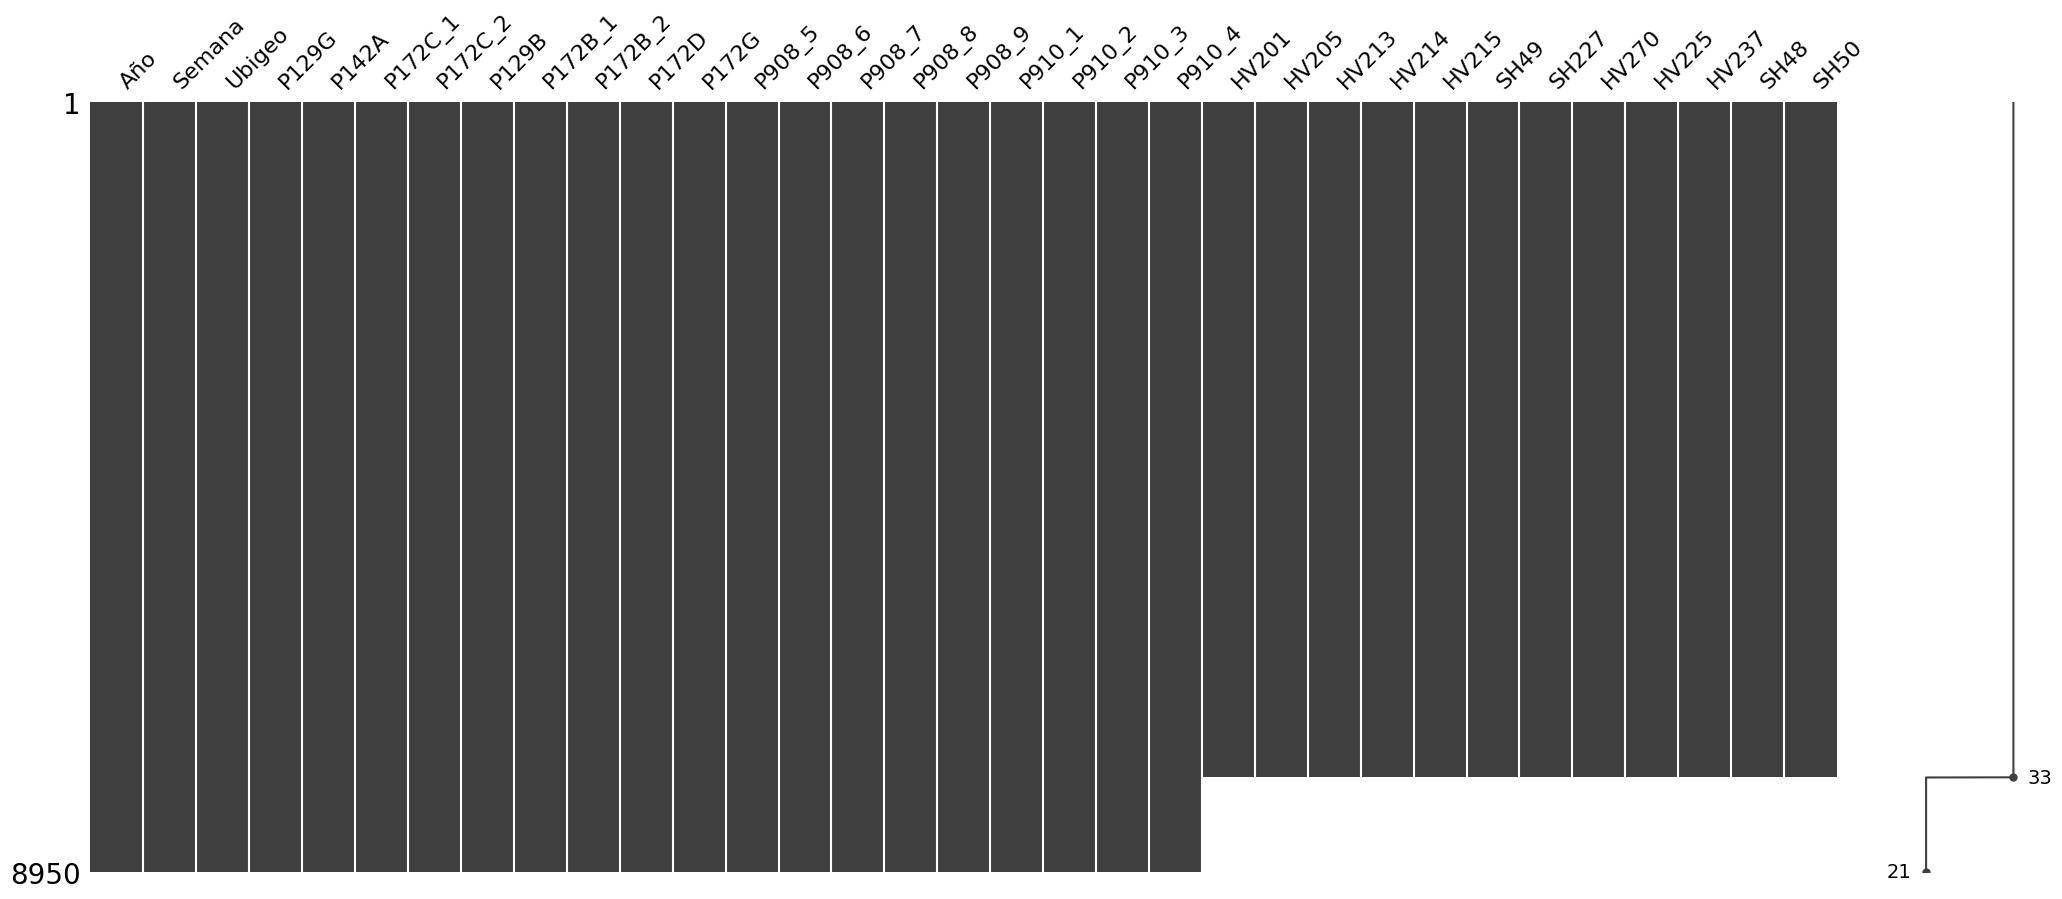

In [367]:
def interpol(df: pd.DataFrame, num_cols, cat_cols):
    def populate_group(group):
        # Interpolate numerical columns
        for col in num_cols:
            if group[col].notna().sum() > 1:  # Check if there are enough points to interpolate
                group[col] = group[col].interpolate(method='pchip')
        
        # Interpolate categorical columns using nearest neighbor method
        for col in cat_cols:
            group[col] = group[col].interpolate(method='nearest')
            
        return group
    
    df.reset_index(drop=True)
    df_inter = df.groupby('Ubigeo',group_keys=False).apply(populate_group)
    df_inter = formalize_categories(df_inter,num_cols,cat_cols)
    
    return df_inter

saneamiento_p1 = interpol(saneamiento_p1, enapres_num, enapres_cat)
saneamiento_p2 = interpol(saneamiento_p2, endes_num, endes_cat)

saneamiento = pd.merge(left=saneamiento_p1,right=saneamiento_p2,how='left',on=['Año','Semana','Ubigeo'])
msno.matrix(saneamiento)

In [369]:
sql_saneamiento = district_imputation(saneamiento,vars=endes_num+endes_cat,tempo='annual')

sql_saneamiento.to_csv(r'datasets\saneamiento\sql_saneamiento.csv',index=False)

# Final

In [16]:
sql_dengue = pd.read_csv(r'datasets\sql_dengue.csv').drop(columns=['Unnamed: 0'])
sql_clima = pd.read_excel(r'datasets\clima.xlsx').drop(columns=['Unnamed: 0'])
sql_saneamiento = pd.read_csv(r'datasets\sql_saneamiento.csv')

<Axes: >

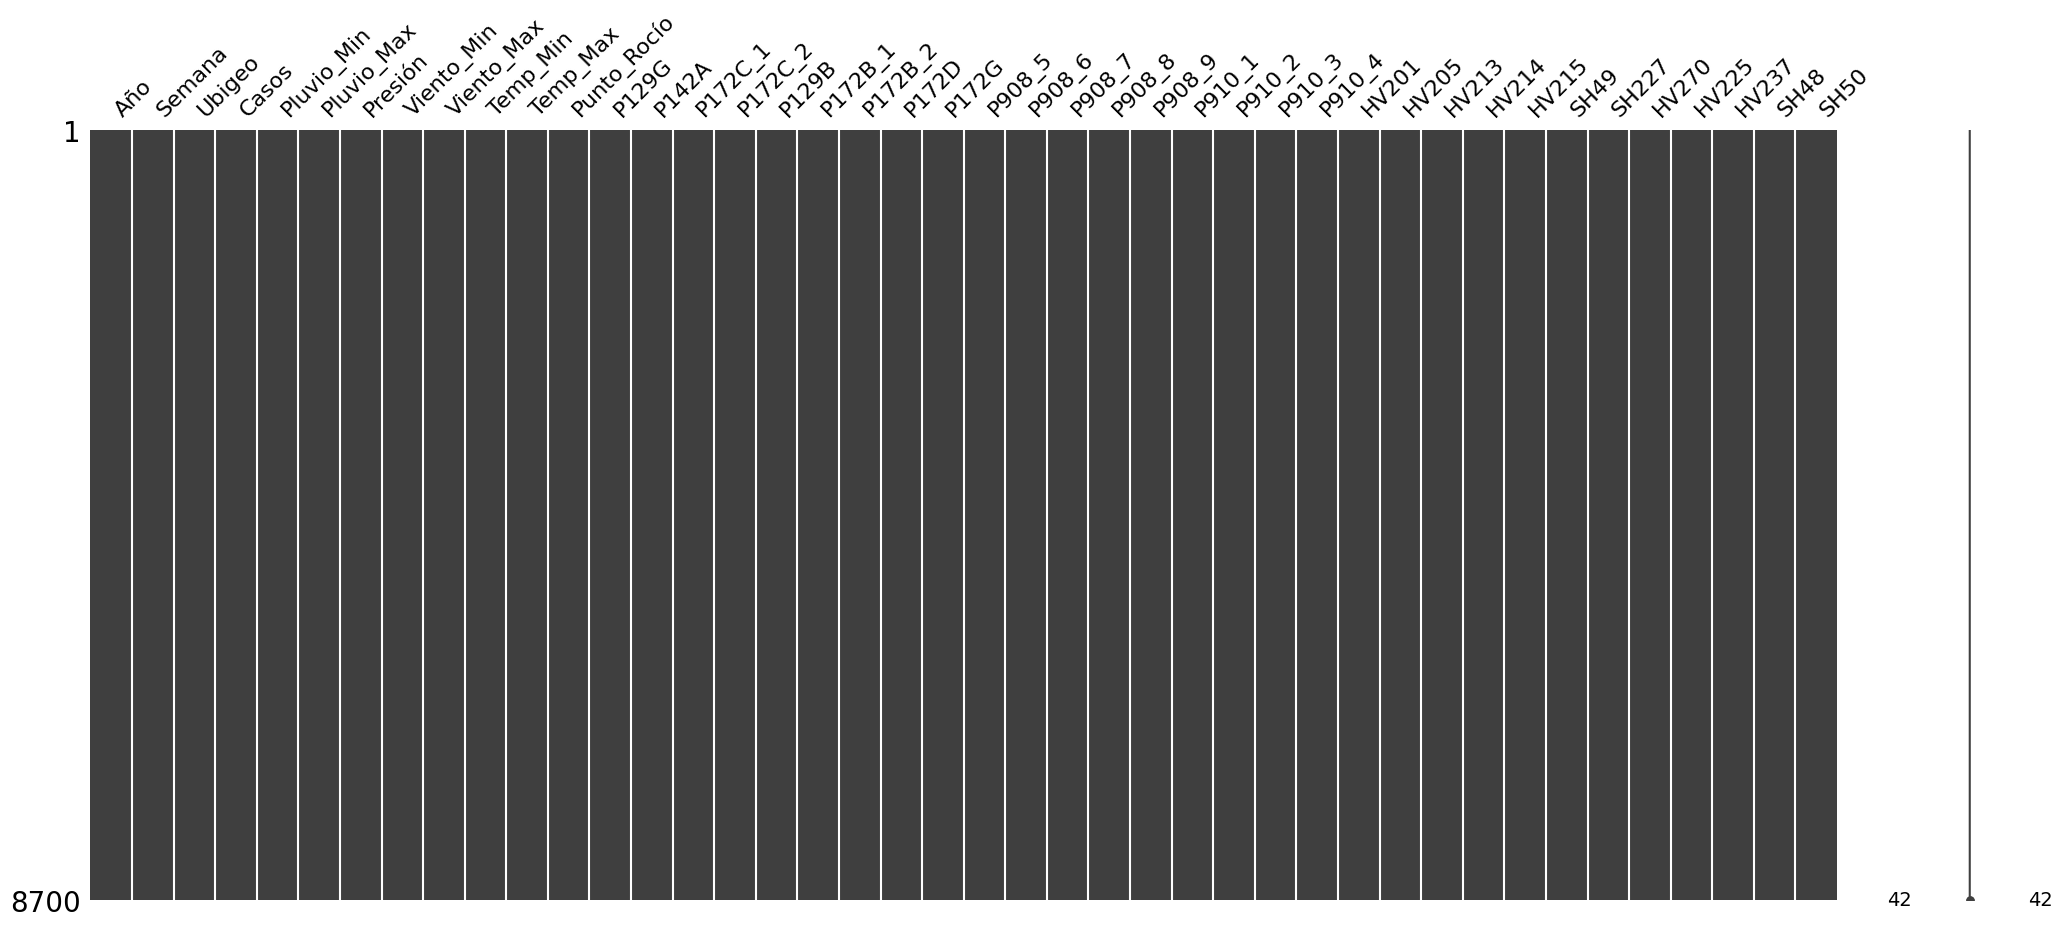

In [18]:
import missingno as msno

full_dataset = pd.merge(left=sql_dengue,right=sql_clima,how='left',on=['Año','Semana','Ubigeo'])
full_dataset = pd.merge(left=full_dataset,right=sql_saneamiento,how='left',on=['Año','Semana','Ubigeo'])
full_dataset.dropna(inplace=True)
msno.matrix(full_dataset)

In [19]:
nuevos = [
    "Año",
    "Semana",
    "Ubigeo",
    "casos",
    "pluvio_min",
    "pluvio_max",
    "presión",
    "viento_min",
    "viento_max",
    "temp_min",
    "temp_max",
    "humedad",
    "agua_procedencia_1",
    "conexión_sanitario_1",
    "satisf_barrido",
    "satisf_basura",
    "agua_potable",
    "barrido_calle",
    "basura_recolec",
    "separacion_basura",
    "informacion_basura",
    "pistas_asfaltadas",
    "pistas_empedradas",
    "pistas_tierra",
    "veredas_concreto",
    "escaleras_concreto",
    "exposicion_basurales",
    "exposicion_inundaciones",
    "exposicion_precipicios",
    "exposicion_deslizamientos",
    "agua_procedencia_2",
    "conexión_sanitario_2",
    "vivienda_piso",
    "vivienda_pared",
    "vivienda_techo",
    "tipo_envase",
    "prueba_cloro",
    "indice_riqueza",
    "sanitario_compartido",
    "purificacion_agua",
    "conserva_agua",
    "tapa_agua"
]

full_dataset.columns = nuevos
full_dataset_v1

,Año,Semana,Ubigeo,casos,pluvio_min,pluvio_max,presión,viento_min,viento_max,temp_min,...,vivienda_piso,vivienda_pared,vivienda_techo,tipo_envase,prueba_cloro,indice_riqueza,sanitario_compartido,purificacion_agua,conserva_agua,tapa_agua
0,2021,1,150102,0.0,0.0,0.0,1012.0,3.0,11.0,20.000000,...,5,2,1,3,1,2,0.076923,0.961538,1.000000,1.000000
1,2021,1,150103,0.0,0.0,0.0,1015.0,3.0,13.0,18.000000,...,5,2,1,3,1,3,0.138614,0.990196,1.000000,0.992308
2,2021,1,150104,0.0,0.0,0.0,1012.0,9.0,11.0,19.333333,...,2,2,1,3,1,3,0.111111,1.000000,0.948470,0.902959
3,2021,1,70102,0.0,0.0,0.0,1012.0,12.0,12.0,20.000000,...,5,2,1,3,1,4,0.053030,0.954545,0.945205,0.876712
4,2021,1,150105,0.0,0.0,0.0,1013.0,9.0,12.0,20.000000,...,4,2,1,3,0,4,0.115385,1.000000,1.000000,0.956522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,2024,18,150140,57.0,0.0,0.0,1011.0,6.0,15.0,19.000000,...,5,2,1,3,1,4,0.074957,0.987230,0.968869,0.957893
8696,2024,18,150141,10.0,0.0,0.0,1011.0,7.0,14.0,20.000000,...,5,2,1,3,1,4,0.072039,0.989633,0.946162,0.915387
8697,2024,18,70106,296.0,0.0,0.0,1011.0,9.0,13.0,19.000000,...,5,2,1,3,1,3,0.073895,0.978880,0.973292,0.964283
8698,2024,18,150142,74.0,0.0,0.0,1011.0,8.0,15.0,19.000000,...,5,2,1,3,1,4,0.081151,0.988161,0.962364,0.940705


In [20]:
full_dataset.to_csv(r'datasets\full_dataset\v1\all_weeks.csv',index=False)

In [21]:
half_dataset_v1 = full_dataset.loc[full_dataset['Semana']>18,:]
half_dataset_v1.to_csv(r'datasets\full_dataset\v1\summer_weeks.csv',index=False)

In [22]:
logic_discarted = [
    'presión',
    'viento_min',
    'viento_max',
    'informacion_basura',
    'pistas_asfaltadas',
    'pistas_empedradas',
    'pistas_tierra',
    'veredas_concreto',
    'escaleras_concreto',
    'agua_procedencia_2',
    'conexión_sanitario_2',
    'vivienda_piso'
]

full_dataset.drop(columns=logic_discarted,inplace=True)
full_dataset.to_csv(r'datasets\full_dataset\v2\all_weeks.csv',index=False)

half_dataset = full_dataset.loc[full_dataset['Semana']>18,:]
half_dataset.to_csv(r'datasets\full_dataset\v2\summer_weeks.csv',index=False)